**Needed only to run the code on Google colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Question 2: Clustering with K-means**

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [4]:
file_path = "/content/drive/MyDrive/Dataset/DA/HW2/iris.csv"


"""
Use the following 'file_path' variable if running on local machine.
The file 'iris.csv' must be in the same directory as the program file.
O/W change the 'file_path' to the directory where the dataset is stored.
"""

#file_path = "./iris.csv"

df_data = pd.read_csv(file_path, header=None, names = ['x1', 'x2', 'x3', 'x4', 'Label'])


Pre-processing data

In [8]:
df_data.dropna()

df_train_data = df_data.iloc[:, :-1]

df_data_scaled = (df_train_data - df_train_data.mean()) / (df_train_data.std())

train_data = df_train_data.values


train_data_scaled = StandardScaler().fit_transform(train_data)


**Creating numeric categorical labels**

In [9]:
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

train_label = df_data['Label'].apply(class_labels.index).values


PCA on non-scaled data

In [10]:
pca_1 = PCA(n_components=1)
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)

data_reduced_1 = pca_1.fit_transform(train_data)
data_reduced_2 = pca_2.fit_transform(train_data)
data_reduced_3 = pca_3.fit_transform(train_data)
data_reduced_4 = pca_4.fit_transform(train_data)


**K-means on the reduced dimensionality of non-scaled data**

In [11]:
kmeans_1 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_1)
kmeans_2 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_2)
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_3)
kmeans_4 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_4)

In [12]:
variance_ratio_1 = pca_1.explained_variance_ratio_
variance_ratio_2 = pca_2.explained_variance_ratio_
variance_ratio_3 = pca_3.explained_variance_ratio_
variance_ratio_4 = pca_4.explained_variance_ratio_

print("---non-scaled data---\n")

print("variance_ratio_1 : ", sum(variance_ratio_1[:1]))
print("variance_ratio_2 : ", sum(variance_ratio_2[:2]))
print("variance_ratio_3 : ", sum(variance_ratio_3[:3]))
print("variance_ratio_4 : ", sum(variance_ratio_4[:4]))

print("\n-----Eigen values-----\n")
print(pca_4.explained_variance_)

cov_mat = np.cov(data_reduced_4.T)

print()
print("Covariance matrix of transformed data\n")
print(cov_mat)

print()
print("Covariance matrix of original data\n")
print(np.cov(train_data.T))

---non-scaled data---

variance_ratio_1 :  0.9246187232017271
variance_ratio_2 :  0.977685206318795
variance_ratio_3 :  0.9947878161267247
variance_ratio_4 :  1.0

-----Eigen values-----

[4.22824171 0.24267075 0.0782095  0.02383509]

Covariance matrix of transformed data

[[ 4.22824171e+00 -6.53655031e-17  5.32982294e-18 -1.09053687e-17]
 [-6.53655031e-17  2.42670748e-01  2.20342821e-17  9.43187254e-18]
 [ 5.32982294e-18  2.20342821e-17  7.82095000e-02  7.07169093e-18]
 [-1.09053687e-17  9.43187254e-18  7.07169093e-18  2.38350930e-02]]

Covariance matrix of original data

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


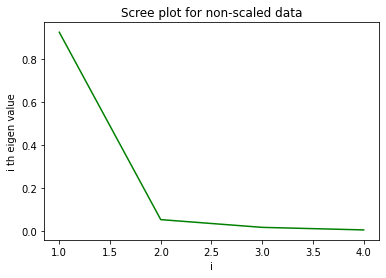

In [13]:
# scree plot
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = variance_ratio_4.tolist()

plt.plot(x, y, color='g')

# naming the x axis
plt.xlabel('i')
# naming the y axis
plt.ylabel("i th eigen value")
 
# giving a title to my graph
plt.title('Scree plot for non-scaled data')
 
# function to show the plot
plt.show()



**PCA on scaled data**

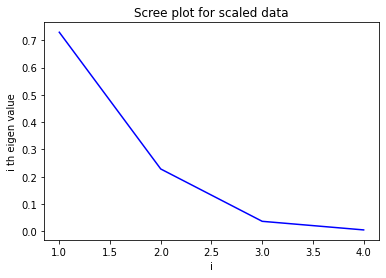

In [14]:
pca_scaled_1 = PCA(n_components=1)
pca_scaled_2 = PCA(n_components=2)
pca_scaled_3 = PCA(n_components=3)
pca_scaled_4 = PCA(n_components=4)

data_reduced_scaled_1 = pca_scaled_1.fit_transform(train_data_scaled)
data_reduced_scaled_2 = pca_scaled_2.fit_transform(train_data_scaled)
data_reduced_scaled_3 = pca_scaled_3.fit_transform(train_data_scaled)
data_reduced_scaled_4 = pca_scaled_4.fit_transform(train_data_scaled)


# scree plot
import matplotlib.pyplot as plt

y_scaled = pca_scaled_4.explained_variance_ratio_.tolist()

plt.plot(x, y_scaled, color='b')

# naming the x axis
plt.xlabel('i')
# naming the y axis
plt.ylabel("i th eigen value")
 
# giving a title to my graph
plt.title('Scree plot for scaled data')
 
# function to show the plot
plt.show()


**K-means on the reduced dimensionality of scaled data**

In [15]:
kmeans_scaled_1 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_scaled_1)
kmeans_scaled_2 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_scaled_2)
kmeans_scaled_3 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_scaled_3)
kmeans_scaled_4 = KMeans(n_clusters=3, random_state=0).fit_predict(data_reduced_scaled_4)



```
*** Silhoutte score ***
```


The first clustering metric that we are going to calculate is the Silhoutte score. It is a Internal Evaluation metric. So for calculating this metric we
don't need any groud truth. The metric is calculated based on the clustering result itself.

Silhoutte score measures the separation in terms of distance between the clusters. It gives a measure of how close every point of a cluster is to the points in the neighbouring clusters. So for a sample the Silhoutte score is calculated using the mean intra-class distance and the mean distance between each point of the nearest class that the sample doesn't fall in. The mean of Silhoutte score or coefficient gives the mean/average Silhoutte score.



```
Explanation of the Silhoutte Score we got
```

Observing the results presented below, we see that the average Silhoutte score is highest/best for KMeans clustering performed on the transformed data after PCA with only one principle component. This is true for both scaled and non-scaled data. Observing both (for scaled and non-scaled data) the scree-plots above we see that there is a clear elbow visible at the second eigen value (so we should choose only the first eigen value). As there is not much difference in the Silhoutte score results between scaled and non-scaled data, we will hereby talk about only the KMeans results of the **non-Scaled** data.


From the covariance matrix of the transformed data we see that the variance of the first principle component is much higher than that of the rest of the tree principle components. Then from the eigen values we see that the first eigen value is much higher than other three. Infact the eigen value and the variance of only the first principle component are greater than one. And also observing the Explained Variance Ratio we see that the first principle component covers more than 92% of the variance. So the clustering result based on the silhoutte score metric is best for the transformed data with only one principle component.










**Average silhouette score of clustering results on non-scaled data**

In [20]:

score_1 = silhouette_score(data_reduced_1, labels = kmeans_1, metric='euclidean')
score_2 = silhouette_score(data_reduced_2, labels = kmeans_2, metric='euclidean')
score_3 = silhouette_score(data_reduced_3, labels = kmeans_3, metric='euclidean')
score_4 = silhouette_score(data_reduced_4, labels = kmeans_4, metric='euclidean')

print("-----Silhouette_score on non-Scaled data-----\n")
print("Principle comp = 1, Silhouette_score -> ", score_1)
print("Principle comp = 2, Silhouette_score -> ", score_2)
print("Principle comp = 3, Silhouette_score -> ", score_3)
print("Principle comp = 4, Silhouette_score -> ", score_4)
print()

-----Silhouette_score on non-Scaled data-----

Principle comp = 1, Silhouette_score ->  0.6770761192800119
Principle comp = 2, Silhouette_score ->  0.597676421954799
Principle comp = 3, Silhouette_score ->  0.5630437008750581
Principle comp = 4, Silhouette_score ->  0.55281901235641



**Average silhouette score of clustering results on scaled data**

In [21]:

score_scaled_1 = silhouette_score(data_reduced_scaled_1, labels = kmeans_scaled_1, metric='euclidean')
score_scaled_2 = silhouette_score(data_reduced_scaled_2, labels = kmeans_scaled_2, metric='euclidean')
score_scaled_3 = silhouette_score(data_reduced_scaled_3, labels = kmeans_scaled_3, metric='euclidean')
score_scaled_4 = silhouette_score(data_reduced_scaled_4, labels = kmeans_scaled_4, metric='euclidean')

print("---Silhouette_score on Scaled data---\n")
print("Principle comp = 1, Silhouette_score -> ", score_scaled_1)
print("Principle comp = 2, Silhouette_score -> ", score_scaled_2)
print("Principle comp = 3, Silhouette_score -> ", score_scaled_3)
print("Principle comp = 4, Silhouette_score -> ", score_scaled_4)

print()

---Silhouette_score on Scaled data---

Principle comp = 1, Silhouette_score ->  0.6754183875905304
Principle comp = 2, Silhouette_score ->  0.5091683341538228
Principle comp = 3, Silhouette_score ->  0.46613062910381436
Principle comp = 4, Silhouette_score ->  0.45994823920518657





```
*** Adjusted Rand Index ***
```
It is an external evaluation matrix for clustering performance. It requires ground truth labels. Once again observing the results presented below we see that the adjusted rand index score is highest for transformed data using one principle component. And once again the observation is same for both scaled and non-scaled data. Even though the measure for scaled data is a bit better compared to that of non-scaled data. But they both fall in the same range (0.65 < ARI <= 0.80). The reason for the transformed data using PCA with one principle component outperforming the other three is same as before, the first principle component captures most variance.

[The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6) 

So lets say the clustering result C = [0,0,1,1] and the Ground truth GT = [0,0,1,1]. The Rand Index measure would be 1. Even if the GT or C changes to following [1,1,0,0] or [3,3,2,2] the Rand Index measure stays the same as long as the first two elements and the last two elements are paired together no matter the cluster label. As the Rand Index measures if the algorithm puts a pair of elements together or not. In the above two cases no matter the orientation of the GT and C. The first two elements are in the same cluster and the second two elements are put in the same cluster.



```
GT = [0,0,1,1] or [1,1,0,0]
C =  [0,0,1,1] or [1,1,0,0] or even [2,2,5,5]
```

No matter what the labelling is as long as the first two elements and the second two elements are put together the measure stays the same.



```
# **Comparison between Silhoutte Score and Adjusted Rand Index**
```

From the discussion presented above we can see that Silhoutte Score measures the clustering performance in terms of distance or separability between the clusters and intra class variance. Where as the Adjusted Rand Index measures performance in terms of paired groupings. Based on every pair of elements in the two clusters to be measured are put together or not put together the clustering score of Adjusted Rand Index stays the same.

In the dataset given to us the variance was a bit less which is evidenced by the covariance matrices and eigen values as well. So for any number of principle components (1,2,3 or 4) we see that the measurement of Adjusted Rand Index is higher than the measurement of Silhoutte Score.








**adjusted_rand_score on KMeans of the non-scaled data**

In [18]:
ars_1 = adjusted_rand_score(kmeans_1, train_label)
ars_2 = adjusted_rand_score(kmeans_2, train_label)
ars_3 = adjusted_rand_score(kmeans_3, train_label)
ars_4 = adjusted_rand_score(kmeans_4, train_label)

print("---Adjusted Rand score on non-scaled data---\n")
print("Adjusted Rand Score for 1 principle comp: ", ars_1)
print("Adjusted Rand Score for 2 principle comp: ", ars_2)
print("Adjusted Rand Score for 3 principle comp: ", ars_3)
print("Adjusted Rand Score for 4 principle comp: ", ars_4)
print()

---Adjusted Rand score on non-scaled data---

Adjusted Rand Score for 1 principle comp:  0.7726314170414115
Adjusted Rand Score for 2 principle comp:  0.7163421126838476
Adjusted Rand Score for 3 principle comp:  0.7302382722834697
Adjusted Rand Score for 4 principle comp:  0.7302382722834697



**adjusted_rand_score on KMeans of the scaled data**

In [19]:
ars_scaled_1 = adjusted_rand_score(kmeans_scaled_1, train_label)
ars_scaled_2 = adjusted_rand_score(kmeans_scaled_2, train_label)
ars_scaled_3 = adjusted_rand_score(kmeans_scaled_3, train_label)
ars_scaled_4 = adjusted_rand_score(kmeans_scaled_4, train_label)

print("---Adjusted Rand score on scaled data---\n")
print("Adjusted Rand Score for 1 principle comp: ", ars_scaled_1)
print("Adjusted Rand Score for 2 principle comp: ", ars_scaled_2)
print("Adjusted Rand Score for 3 principle comp: ", ars_scaled_3)
print("Adjusted Rand Score for 4 principle comp: ", ars_scaled_4)
print()

---Adjusted Rand score on scaled data---

Adjusted Rand Score for 1 principle comp:  0.8015498244339508
Adjusted Rand Score for 2 principle comp:  0.6201351808870379
Adjusted Rand Score for 3 principle comp:  0.6201351808870379
Adjusted Rand Score for 4 principle comp:  0.6201351808870379

